#### YOLOE reseach notebook

In [1]:
from ultralytics import YOLOE
model = YOLOE("yoloe-11l-seg.pt")  
names = ["bus","detect person","dustbin","road sign board"]
model.set_classes(names, model.get_text_pe(names))


results = model.predict("person_bus.jpg")
results[0].show()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

d:\Learning Folder\image_segmentation\yoloe\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Ultralytics 8.3.103  Python-3.11.7 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i5-13500)
YOLOe-11l-seg summary (fused): 227 layers, 35,117,862 parameters, 2,254,374 gradients, 144.1 GFLOPs

image 1/1 d:\Learning Folder\image_segmentation\person_bus.jpg: 448x640 1 bus, 1 detect person, 1 dustbin, 378.4ms
Speed: 5.9ms preprocess, 378.4ms inference, 10.4ms postprocess per image at shape (1, 3, 448, 640)


In [74]:
model.get_text_pe(names).shape    # This is embedding of your 
# shape analysis 
# [1, 3, 512] 
# T   R   C  
# WHERE EACH ROW FOR EACH CLASS WORD EMBEDDING

torch.Size([1, 3, 512])

In [72]:
model.get_text_pe(names)

tensor([[[-0.0139,  0.0009,  0.0550,  ..., -0.0521, -0.0126, -0.0674],
         [-0.0097,  0.0180, -0.0054,  ..., -0.0296, -0.0189,  0.0087],
         [ 0.0691,  0.0244, -0.0521,  ..., -0.0151,  0.0196, -0.0670]]])

In [3]:
result = results[0] 
print("Mask segmentation shape: ",result.masks.data.shape)

print("NO. of instance mask detected : ",result.masks.data.shape[0])

Mask segmentation shape:  torch.Size([3, 448, 640])
NO. of instance mask detected :  3


In [4]:
result.masks.data   ### Binary Mask provide the yolo, (1 segemented , 0 background)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [5]:
result.masks.data.shape

torch.Size([3, 448, 640])

In [6]:
dt = {0:0,1:0}
for k  in result.masks.data.ravel():
    dt[int(k)] += 1

print(dt)

{0: 801075, 1: 59085}


In [19]:
## mask plotting 
import torch
import numpy as np
import cv2

segmentation_mask = result.masks.data   # shape now  (448, 640)  # original shape 1000

segmentation_mask = segmentation_mask.squeeze(0).cpu().numpy()  

original_image = cv2.imread('person_bus.jpg')
original_image_resized = cv2.resize(original_image, (640, 448))   # due to the yolo scaling
single_channel_img  =  np.expand_dims(segmentation_mask[2], axis=-1)
print("make a mask in single channel : ",single_channel_img.shape )
masked_image = original_image_resized * single_channel_img

cv2.imshow('Masked Image', masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# mask plotting using matplotlib 

make a mask in single channel :  (448, 640, 1)


In [16]:
segmentation_mask.shape 

(3, 448, 640)

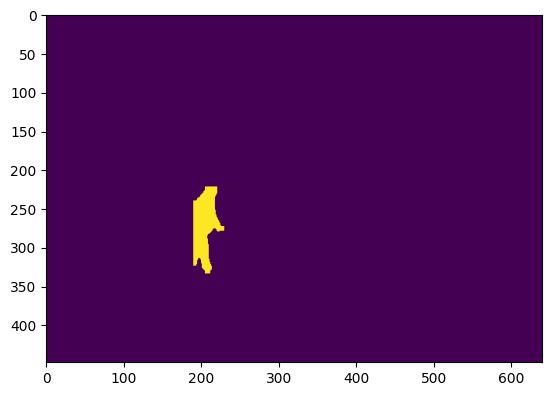

In [14]:
import matplotlib.pyplot as plt 
plt.imshow(single_channel_img)

In [24]:
import numpy as np
import cv2

segmentation_mask = result.masks.data 

segmentation_mask = segmentation_mask.squeeze(0).cpu().numpy()  # Shape: [448, 640]
# print(segmentation_mask.shape )  # (3, 448, 640)


original_image = cv2.imread('person_bus.jpg')
original_image_resized = cv2.resize(original_image, (640, 448))    # after resizing ===> (448, 640, 3)


output_image_frame = np.ones_like(original_image_resized) * 255    #  (448, 640, 3)
output_image_frame[segmentation_mask[0] == 1] = original_image_resized[segmentation_mask[0] == 1]



# Display the result
cv2.imshow('Masked Image with Background', output_image_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('segmented_output.jpg', output_image_frame)

True

In [32]:
import numpy as np
import cv2

segmentation_mask = result.masks.data 

segmentation_mask = segmentation_mask.squeeze(0).cpu().numpy()  # Shape: [448, 640]
# print(segmentation_mask.shape )  # (3, 448, 640)


original_image = cv2.imread('person_bus.jpg')
print(original_image.shape)
# original_image_resized = cv2.resize(original_image, (640, 448))    # after resizing ===> (448, 640, 3)
resize_mask = cv2.resize(segmentation_mask[0],(1000,667))
output_image_frame = np.ones_like(original_image) * 255    
output_image_frame[resize_mask == 1] = original_image[resize_mask == 1]



# Display the result
cv2.imshow('Masked Image with Background', output_image_frame)
cv2.imshow('Original image', original_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('segmented_output.jpg', output_image_frame)

(667, 1000, 3)


True

### P3rson segmentation

In [58]:
from ultralytics import YOLO
model = YOLO("yolov8m-seg.pt")
results = model.predict("https://ultralytics.com/images/bus.jpg") 
result = results[0]
result.show()   # show output with all instance objects



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 d:\Learning Folder\image_segmentation\bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 224.8ms
Speed: 1.4ms preprocess, 224.8ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 480)


In [59]:
from ultralytics import YOLO
model = YOLO("yolov8m-seg.pt")
results = model.predict("https://ultralytics.com/images/bus.jpg",classes=[0],max_det=2) 
result = results[0]
result.show()   # show output with all instance objects



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 d:\Learning Folder\image_segmentation\bus.jpg: 640x480 2 persons, 211.5ms
Speed: 1.5ms preprocess, 211.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


In [56]:
result = results
print("No. of classes : ",len(result[0].names))  

No. of classes :  80


In [64]:
print("No. of object segmented : ",len(result))

No. of object segmented :  2


In [66]:
from ultralytics import YOLO 
model = YOLO("yolov8m-seg.pt")
office_video_path = r"D:\My-Projects\empmonitoring\EmpMonitoring Lite Version\last_6m30s.mp4"
response = model.predict(office_video_path,classes=[0],save=True)




WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/9718) D:\My-Projects\empmonitoring\EmpMonitoring Lite Version\last_6m30s.mp4: 384x640 2 persons, 196.1ms
video 1/1 (frame 2/9718) D:\My-Projects\empmonitoring\EmpMonitoring Lite Version\last_6m30s.mp4: 384x640 3 persons, 169.5ms
video 1/1 (frame 3/9718) D:\My-Projects\empmonitoring\EmpMonitoring Lite Version\last_6m30s.mp4: 384x640 3 persons, 167.6ms
video 1/1 (frame 4/9718) D:\My-Projects\empmonitoring\EmpMonitoring Lite Version\last_

: 